# ニューラルネットワークを使った機械学習とSVM
### ねらい
* PCA (主成分分析) の復習
* SVM （サポートベクトルマシン） の復習
* グリッドサーチの復習
* RBM (制限付きボルツマンマシン) とロジスティク回帰による機械学習とパラメーターチューニング

### RBMとは何か？
* Geoff Hintonによって開発された制限付きボルツマンマシン（RBM）はニューラルネットワークの一種で、次元削減、分類、回帰、協調フィルタリング、特徴学習、トピックモデルなどに役立ちます。http://postd.cc/a-beginners-guide-to-restricted-boltzmann-machines/
* 深層学習 Deep Learningの基礎モデルとして有名 http://aidiary.hatenablog.com/entry/20160316/1458129923
* 難しいけど[こちら](http://www.slideshare.net/takumayagi/rbm-andlearning)が分かりやすいかも。

### ロジスティック回帰とは何か？
* 線形回帰分析が量的変数を予測するのに対して、ロジスティック回帰分析は発生確率を予測する手法です。基本的な考え方は線形回帰分析と同じなのですが、予測結果が 0 から 1 の間を取るように、数式やその前提に改良が加えられています。http://blogs.teradata.com/international/ja/hhg10/
* 近年の外国の論文にロジスティック回帰分析が非常に増えており、これが理解できないと論文を読めないことが多い。このことは、単変量解析では十分な解析ができないことが多いことを示唆しており、今後日本の論文でも、ロジスティック回帰分析が確実に増加していくものと思われる。http://www.ibaraki-kodomo.com/toukei/logis.html

### MNISTデータセットのロード
まずは、データのロードを行います。MNISTは、機械学習などによく使われる手書き文字の画像データセットです。

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

読み込んだデータを pandas で開いて確認します。8x8のマス目に色の濃さの数字が入った画像情報になります。

In [2]:
import pandas as pd
pd.DataFrame(digits.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


最初の１００データだけ、とりあえず図示してみます。

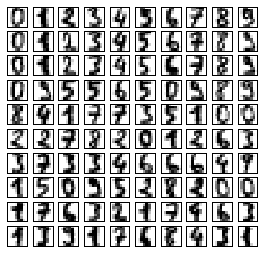

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(digits.data):
    if i == 100:
        break
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

### 主成分分析(PCA)
データの全体像を眺めるため、とりあえずPCAして第一主成分と第二主成分でプロットし、数字ごとに色分けしてみます。

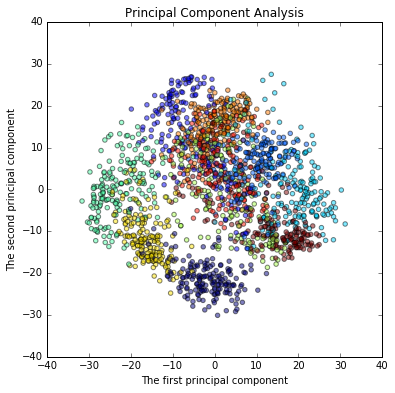

In [4]:
%matplotlib inline
from sklearn.decomposition import PCA #主成分分析器
pca = PCA()
pca.fit(digits.data)
feature = pca.transform(digits.data)
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, c=digits.target)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.show()

### サポートベクトルマシン(SVM)
さてここから、以上のデータをSVMで学習して、手書きの数字を正しく判別できるようにします。まずは、データを半分に分割し、一方をトレーニングセット、他方をテストセットとして用います。

In [5]:
from sklearn import cross_validation as cv
X_train, X_test, Y_train, Y_test = cv.train_test_split(digits.data, digits.target, test_size=0.5)

__線形カーネルSVM__ による学習と精度評価

In [6]:
!date
from sklearn import svm
from sklearn import cross_validation as cv
from sklearn.metrics import accuracy_score
import time
start = time.time()
classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:56:02 JST 2016
0.979977753059
elapsed_time:0.0555329322815


__RBFカーネルSVM__ による学習と精度評価
* SVM(RBFカーネル)のハイパーパラメータを変えると何が起こるの? http://qiita.com/sz_dr/items/f3d6630137b184156a67

In [7]:
!date
from sklearn import svm
from sklearn import cross_validation as cv
from sklearn.metrics import accuracy_score
import time
start = time.time()
classifier = svm.SVC(kernel='rbf').fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:56:03 JST 2016
0.311457174638
elapsed_time:0.283664941788


__多項式カーネルSVM__ による学習と精度評価
* SVMで多項式カーネルを使うメリット http://d.hatena.ne.jp/hase1031/20121118/1353251549

In [8]:
!date
from sklearn import svm
from sklearn import cross_validation as cv
from sklearn.metrics import accuracy_score
import time
start = time.time()
classifier = svm.SVC(kernel='poly')
Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:56:05 JST 2016
0.987764182425
elapsed_time:0.0576341152191


### SVMのグリッドサーチ
グリッドサーチで最適のパラメーターを探してみます。

In [9]:
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [10]:
!date
import time
start = time.time()
from sklearn import grid_search
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(X_train, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:56:11 JST 2016
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.991101223582
elapsed_time:2.39944982529


試した中で最適のパラメーターが分かりました。改めて計算してみると

In [11]:
!date
from sklearn import svm
from sklearn import cross_validation as cv
import time
start = time.time()
classifier = svm.SVC(kernel='rbf', C=10, gamma=0.001).fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:56:25 JST 2016
0.991101223582
elapsed_time:0.115391016006


### 画像を上下左右にずらす
以上の機械学習は、手書きデータの認識としては実は弱点があります。というのは、絵が上下左右のいずれかに１ピクセルでもずれたら判別できない恐れがあるからです。そこで、上下左右にずれても判別できるように改良してみましょう。まず、上下左右にずらすための関数を作ります。

In [12]:
import numpy as np
from scipy.ndimage import convolve
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

以上の関数を使って、元のデータに、上下左右にずらした画像を追加した、新しいデータを作ります。

In [13]:
X, Y = nudge_dataset(digits.data, digits.target)

データの全体像を眺めるため、とりあえずPCAして第一主成分と第二主成分でプロットし、数字ごとに色分けしてみます。

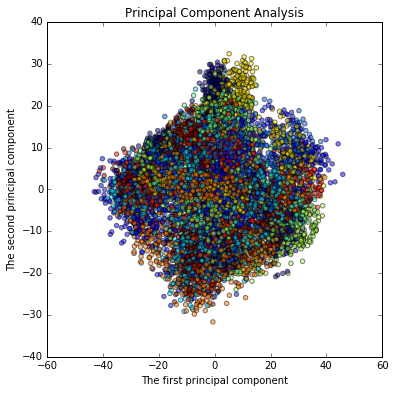

In [14]:
%matplotlib inline
from sklearn.decomposition import PCA #主成分分析器
pca = PCA()
pca.fit(X)
feature = pca.transform(X)
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, c=Y)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.show()

いかにも分類が難しそうになってしまいました。
### 改めて、いろんなSVMを試してみましょう。

In [15]:
from sklearn import cross_validation as cv
X_train, X_test, Y_train, Y_test = cv.train_test_split(X, Y, test_size=0.5)

In [16]:
!date
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:56:45 JST 2016
0.821277542844
elapsed_time:13.6326389313


In [17]:
!date
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
classifier = svm.SVC(kernel='rbf').fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:57:04 JST 2016
0.347206766081
elapsed_time:6.27586698532


In [18]:
!date
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
classifier = svm.SVC(kernel='poly').fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:57:14 JST 2016
0.982417093256
elapsed_time:1.10135698318


グリッドサーチで最適のパラメーターを探してみます。以下の例では、２時間半ちかくかかりました。

In [19]:
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [20]:
!date
import time
start = time.time()
from sklearn import grid_search
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(X_train, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 12:57:25 JST 2016
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.98887157801
elapsed_time:8784.83184409


### ロジスティック回帰による機械学習
さて、ここからが本番です。ロジスティック回帰で予測してみます。

In [87]:
from sklearn import linear_model
import time
start = time.time()
logistic = linear_model.LogisticRegression().fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

0.779657244603
elapsed_time:1.80269408226


### ロジスティック回帰のグリッドサーチ
グリッドサーチで最適なパラメーターを探してみます。

In [78]:
parameters = [
    {'solver': ['newton-cg'], 'C': [1, 10, 100, 1000], 'multi_class':['ovr', 'multinomial']},
    {'solver': ['lbfgs'], 'C': [1, 10, 100, 1000], 'multi_class':['ovr', 'multinomial']},
    {'solver': ['liblinear'], 'C': [1, 10, 100, 1000], 'penalty' :['l1','l2']},
    {'solver': ['sag'], 'C': [1, 10, 100, 1000]}
    ]
!date
import time
start = time.time()
from sklearn import grid_search
gs = grid_search.GridSearchCV(linear_model.LogisticRegression(), parameters).fit(X_train, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 15:58:32 JST 2016
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
0.791008235032
elapsed_time:171.045464039


### いよいよ RBM+ロジスティック回帰
次に、制限ボルツマンマシンの後にロジスティック回帰を行う__パイプライン__を作成して、これを用いた機械学習

In [100]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
!date
import time
start = time.time()
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)]).fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 20:39:03 JST 2016
0.0950367237926
elapsed_time:2.29751396179


非常に精度が悪い。というか、予測結果 Y_pred を見れば分かるけど、ちゃんと予測していない。これは、RBMの入力には値を[0,1]の範囲にスケーリングしなければいけないことによる。そこで、スケーリングのための関数を用意する。

In [104]:
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

データのスケーリング

In [105]:
X_train2 = scale(X_train)
X_test2 = scale(X_test)

スケーリングしたデータを用いれば、そこそこのパフォーマンスを示すようになる。

In [106]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
!date
import time
start = time.time()
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)]).fit(X_train2, Y_train)
Y_pred = classifier.predict(X_test2)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 20:42:26 JST 2016
0.832851101714
elapsed_time:4.70889401436


### RBM+ロジスティック回帰でグリッドサーチ
制限ボルツマンマシンの後にロジスティック回帰を行うパイプラインで、グリッドサーチする。１時間ちょっとかかった。

In [91]:
params = {
    "rbm__learning_rate": [0.1, 0.01, 0.001],
    "rbm__n_iter": [20, 40, 80],
    "rbm__n_components": [50, 100, 200],
    "logistic__C": [1, 10, 100],
    "logistic__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

In [107]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
!date
import time
start = time.time()
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
gs = grid_search.GridSearchCV(classifier, params, n_jobs=2).fit(X_train2, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test2)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 20:44:48 JST 2016
Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=200, n_iter=20,
       random_state=None, verbose=0)), ('logistic', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
0.909637213443
elapsed_time:3984.238585


さっきよりは良い結果が出たけど、残念ながらSVMで得た最高スコアよりは下回った。ベストなパラメーターを参考に、もう少しパラメーターチューニングを進めてみる。ここでさらに１時間ちょっとかかった。

In [108]:
params = {
    "rbm__learning_rate": [0.2, 0.1, 0.05],
    "rbm__n_iter": [10, 20, 30],
    "rbm__n_components": [150, 200, 300],
    "logistic__C": [50, 100, 200],
    "logistic__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

In [109]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
!date
import time
start = time.time()
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
gs = grid_search.GridSearchCV(classifier, params, n_jobs=2).fit(X_train2, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test2)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 22:00:44 JST 2016
Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=300, n_iter=30,
       random_state=None, verbose=0)), ('logistic', LogisticRegression(C=200, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False))])
0.928778099266
elapsed_time:4148.94205594


もう少し良くできないかなと、３度目のグリッドサーチを試みる。今度は2.6時間かかった。

In [110]:
params = {
    "rbm__learning_rate": [0.08, 0.05, 0.03],
    "rbm__n_iter": [25, 30, 35],
    "rbm__n_components": [300, 400, 500],
    "logistic__C": [200, 300, 400],
    "logistic__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

In [111]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
!date
import time
start = time.time()
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
gs = grid_search.GridSearchCV(classifier, params, n_jobs=2).fit(X_train2, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test2)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Mon Oct 31 23:16:05 JST 2016
Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=400, n_iter=30,
       random_state=None, verbose=0)), ('logistic', LogisticRegression(C=400, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False))])
0.941241931894
elapsed_time:9506.89664888


もう少しだけ頑張ってみようと４回目のグリッドサーチ。1.8時間ほどかかった。

In [112]:
params = {
    "rbm__learning_rate": [0.08, 0.05, 0.03],
    "rbm__n_iter": [25, 30, 35],
    "rbm__n_components": [350, 400, 450],
    "logistic__C": [400, 500, 600],
    "logistic__solver": ['newton-cg', 'liblinear']}

In [113]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
!date
import time
start = time.time()
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
gs = grid_search.GridSearchCV(classifier, params, n_jobs=2).fit(X_train2, Y_train)
print(gs.best_estimator_)
Y_pred = gs.predict(X_test2)
print (accuracy_score(Y_test, Y_pred))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

Tue Nov  1 09:13:34 JST 2016
Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=400, n_iter=35,
       random_state=None, verbose=0)), ('logistic', LogisticRegression(C=600, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False))])
0.94547073225
elapsed_time:6394.95003486


もっとがんばれば、SVMを超える成果が出る...はず...(力尽きた)
